## Linear Regression

Linear regression models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The goal is to find the optimal coefficients (betas) that minimize the difference between the predicted and actual values.

Common forms of the linear equation:

- Simple linear regression: `y = ax + b`
- Multiple linear regression: `y = b0 + b1x1 + ... + bnxn`

#### Gradient Descent Optimization:

Gradient descent is an iterative optimization algorithm commonly used to find the optimal coefficients in linear regression. It works by:

1. **Initialization:** Starting with an initial guess for the coefficients (betas).
2. **Calculation:** Computing the mean squared error (MSE) to evaluate the model's performance.
3. **Update:** Calculating the gradient of the MSE with respect to the coefficients and updating the coefficients in the direction of steepest descent (i.e., opposite the gradient).
4. **Iteration:** Repeating steps 2 and 3 until the MSE converges or reaches a satisfactory level.

### Data

In [1]:
from sklearn.datasets import make_regression

In [2]:
bias_true = 2.5
X, y, coef_true = make_regression(
    n_samples=200, n_features=10, bias=bias_true, coef=True, random_state=0
)
print(X.shape, y.shape, coef_true.shape)

(200, 10) (200,) (10,)


In [3]:
# drawn from gaussian with zero mean and unit variance.
X.mean(axis=0), X.std(axis=0)

(array([-0.04400644, -0.02686616,  0.04682146, -0.11799807,  0.02761687,
        -0.01502584,  0.02359078,  0.05262236, -0.07173859, -0.03321519]),
 array([0.99975564, 0.95912705, 0.96716903, 0.96712076, 0.94192213,
        0.92674211, 1.06394988, 0.90357571, 0.98727703, 1.03936229]))

In [4]:
# true coefficients
coef_true

array([44.96944303,  9.68032193, 88.97621358, 40.05104636, 10.32532207,
        6.18447832, 28.46940664, 15.48694157, 41.09157343, 51.90989393])

### Implementation

In [5]:
import numpy as np

In [6]:
class LinearRegression:
    def __init__(self, max_iterations=100, learning_rate=0.1):
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate

    def initialize(self, num_features):
        self.coef = np.zeros(num_features)  # (n,)
        self.bias = 0

    def fit(self, X, y):
        m, n = X.shape  # (m, n)
        self.initialize(n)
        losses = []

        for i in range(self.max_iterations):
            # y_hat = wx + b
            preds = X @ self.coef + self.bias  # (m,)

            # MSE loss
            loss = 0.5 * np.mean(np.square(preds - y))
            losses.append(loss)

            # gradient descent
            self.coef -= self.learning_rate / m * X.T @ (preds - y)  # (n,)
            self.bias -= self.learning_rate * np.mean(preds - y)

        return losses, self.coef, self.bias

    def predict(self, X):
        return X @ self.coef + self.bias  # (m,)

### Experiment

In [7]:
num_samples = X.shape[0]

# the new way
rng = np.random.default_rng(0)
permutated_indicies = rng.permutation(num_samples)
train_size = int(num_samples * 0.8)
train_indices, test_indices = (
    permutated_indicies[:train_size],
    permutated_indicies[train_size:],
)

In [8]:
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

print(X_train.shape, X_test.shape)

(160, 10) (40, 10)


In [9]:
model = LinearRegression()
losses, coef, bias = model.fit(X_train, y_train)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 1.0, 'Train error over iterations'),
 Text(0.5, 0, 'Iteration'),
 Text(0, 0.5, 'MSE')]

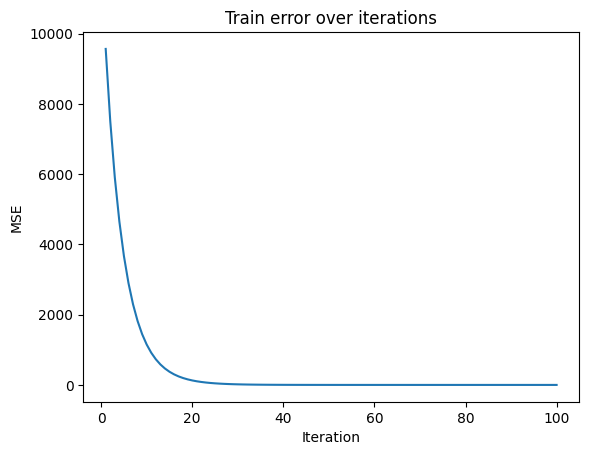

In [11]:
# visualize train error over iterations
ax = sns.lineplot(x=range(1, len(losses) + 1), y=losses)
ax.set(title="Train error over iterations", xlabel="Iteration", ylabel="MSE")

In [12]:
y_preds = model.predict(X_test)
print(y_preds.shape, y_test.shape)
print(f"Test MSE error: {0.5*np.mean(np.square(y_preds - y_test))}")

(40,) (40,)
Test MSE error: 0.00015578835058483646


In [13]:
# check coefficients and bias
coef

array([44.96449131,  9.68081936, 88.96833905, 40.05773706, 10.32433952,
        6.17092321, 28.47040402, 15.48096745, 41.08996389, 51.90987722])

In [14]:
coef_true

array([44.96944303,  9.68032193, 88.97621358, 40.05104636, 10.32532207,
        6.18447832, 28.46940664, 15.48694157, 41.09157343, 51.90989393])

In [15]:
bias, bias_true

(2.499013975712633, 2.5)